## **Assignment 5: Toddler Project**


### Objective

In this assignment, two datasets are merged to create a comprehensive table that includes both sales data and unit costs.

- Nike Sales Dataset (Nike_sales_2024) – Sourced from Kaggle, this dataset contains Nike's global sales data for 2024. (https://www.kaggle.com/datasets/ayushcx/nike-global-sales-data-2024)

- Nike Unit Cost Dataset (Nike_unitcost) – it is generated from [www.mockaroo.com], providing unit cost for different Nike products.

By joining these datasets, a more detailed sales table that includes both sales figures and unit costs, enabling a deeper analysis of profit or pricing strategy for each country/month. 
Also, it can help to identify any potential discrepancies in the Cost Dataset.

### Task
1. Unerstand the data
2. Merge Data (left join)
3. Add "profit" column in dataset
4. Data visualization
5. Identify Missing values in Cost Dataset
6. Export Missing Records for Further Review


In [48]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [49]:
cost = pd.read_csv("../Data/nike_unitCost.csv")  
sales = pd.read_csv("../Data/nike_sales_2024.csv") 

# **1. Understand the data**  

Before create the BIG table, we understand the dataset, we break down the analysis into the following key aspects:

1. Total Rows and Column
2. Summary of Numeric and Categorical Columns
3. Null Data Information
4. Display the First 10 Rows of the Dataset

## 1.1 Total Rows and Columns -  **  

### nike_sales_2024.csv
- The dataset contains **1,000 rows** and **10 columns**.  
- Each row represents a **sales record** for a Nike product.

### nike_cost.csv
- The dataset contains **72 rows** and **3 columns**.  
- Each row represents a **unit cost** for a Nike product line.

In [50]:
print("1. Total rows and columns for nike_sales_2024:")
print("there are ", sales.shape[0], "rows")
print("there are ", sales.shape[1], "columns")

print("2. Total rows and columns for nike_unitCost:")
print("there are ", cost.shape[0], "rows")
print("there are ", cost.shape[1], "columns")

1. Total rows and columns for nike_sales_2024:
there are  1000 rows
there are  10 columns
2. Total rows and columns for nike_unitCost:
there are  70 rows
there are  3 columns


## 1.2 Summary of Numeric and Categorical Columns

In [51]:
print("Summary Statistics for nike_sales_2024:")
sales.describe(include ="all").round(2)

Summary Statistics for nike_sales_2024:


,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
count,1000,1000,1000,1000,1000,1000,1000.00,1000.00,1000.00,1000.00
unique,12,7,3,11,24,3,NaN,NaN,NaN,NaN
top,December,Greater China,Equipment,Outerwear,Windrunner,Budget,NaN,NaN,NaN,NaN
freq,96,161,352,125,65,348,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,28498.95,5039576.41,70.04,176.32
std,NaN,NaN,NaN,NaN,NaN,NaN,12926.50,3267216.81,11.75,75.26
min,NaN,NaN,NaN,NaN,NaN,NaN,5028.00,287400.00,50.00,50.00
25%,NaN,NaN,NaN,NaN,NaN,NaN,17554.25,2344675.00,60.00,110.00
50%,NaN,NaN,NaN,NaN,NaN,NaN,28685.00,4328020.00,71.00,180.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,40026.00,7264942.50,80.00,240.00


In [52]:
print("Summary Statistics for nike_cost:")
cost.describe(include ="all").round(2)

Summary Statistics for nike_cost:


,Product_Line,Price_Tier,Unit_cost
count,70,70,70.00
unique,24,3,NaN
top,KD Series,Budget,NaN
freq,3,24,NaN
mean,NaN,NaN,60.81
std,NaN,NaN,23.96
min,NaN,NaN,20.00
25%,NaN,NaN,41.25
50%,NaN,NaN,65.00
75%,NaN,NaN,82.00


## 1.3 Null Data Information
- There is **no missing values** in **"Both"** dataset.  

In [53]:
print("4. Print the summary about the Null Data information ")
sales.isna().sum()

4. Print the summary about the Null Data information 


Month                      0
Region                     0
Main_Category              0
Sub_Category               0
Product_Line               0
Price_Tier                 0
Units_Sold                 0
Revenue_USD                0
Online_Sales_Percentage    0
Retail_Price               0
dtype: int64

In [54]:
print("4. Print the summary about the Null Data information ")
cost.isna().sum()

4. Print the summary about the Null Data information 


Product_Line    0
Price_Tier      0
Unit_cost       0
dtype: int64

## 1.4 Display the First 5 Rows of the Dataset
(the first 10 rows of the dataset is shown as below:)

In [55]:
## display the first 5 rows 

print("5. Display first 5th records for nike_sales_2024")
sales.head(5)

5. Display first 5th records for nike_sales_2024


,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160


In [56]:
print("5. Display first 5th records for nike_unitCost")
cost.head(5)

5. Display first 5th records for nike_unitCost


,Product_Line,Price_Tier,Unit_cost
0,Air Force 1,Budget,50
1,Air Jordan,Budget,21
2,Air Jordan,Mid-Range,39
3,Air Jordan,Premium,65
4,Air Max,Budget,66


# **2. Merge dataset**  

## Which Join?
**LEFT JOIN**

It's better to keep all sales records and find out the missing costs rather than removing sales records (which would impact total revenue calculations), we should better use a LEFT JOIN

## Why? 
- Ensures all sales records are retained
- If a product's unit cost is missing, it shows NaN
- Helps identify products with missing cost values for further investigation

## What Type of NA Values are created? 

The LEFT JOIN operation will create Nan in the resulting dataset when there is no matching entry in the right-hand dataset (cost) from the left-hand dataset (sales). These NA values occur in columns from the right-hand dataset when the merge can't find a corresponding value for the row in the left-hand dataset.

In this case: any sales records that do not have a matching product line in the unit cost dataset will have NaN values in the Unit_cost column

**NaN** a float type in pandas and indicates that there is no valid number for that field in the merged dataset.

## Result

- A total of 21 records have missing Unit_cost, displaying NaN values
- All of these records fall under "Air Force 1 - Mid-Range" and "Air Force 1 - Premium," indicating the need to review and update the UnitCost file accordingly.

In [57]:
## Left Joins

# Perform a LEFT JOIN on Product_Line and Price_Tier
new = pd.merge(sales, cost, how = 'left', on=["Product_Line", "Price_Tier"])


In [58]:
## display the first 10 merged records
new.head(10)

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Unit_cost
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300,87.0
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210,25.0
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70,81.0
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210,36.0
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160,33.0
5,October,Japan,Apparel,Performance,Dri-FIT,Premium,39344,5508160,73,140,90.0
6,December,Japan,Footwear,Cricket,Vapor Cricket,Budget,30197,6945310,50,230,69.0
7,July,Greater China,Apparel,Tops,Therma-FIT,Mid-Range,42814,6422100,55,150,87.0
8,April,Greater China,Footwear,Cricket,Vapor Cricket,Mid-Range,16489,2473350,78,150,43.0
9,February,Europe,Footwear,Cricket,Vapor Cricket,Mid-Range,43626,10033980,86,230,43.0


## **3. Add "profit" column in dataset**

In [59]:
## Add a column "Profit" in the dataset 

new["Unit_Profit"] = new["Retail_Price"] - new["Unit_cost"]
new

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Unit_cost,Unit_Profit
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300,87.0,213.0
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210,25.0,185.0
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70,81.0,-11.0
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210,36.0,174.0
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160,33.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100,22.0,78.0
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180,51.0,129.0
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150,59.0,91.0
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50,23.0,27.0


## **4. Data visualization**


### Graph 1: Bar Chart: Profit by Product Line

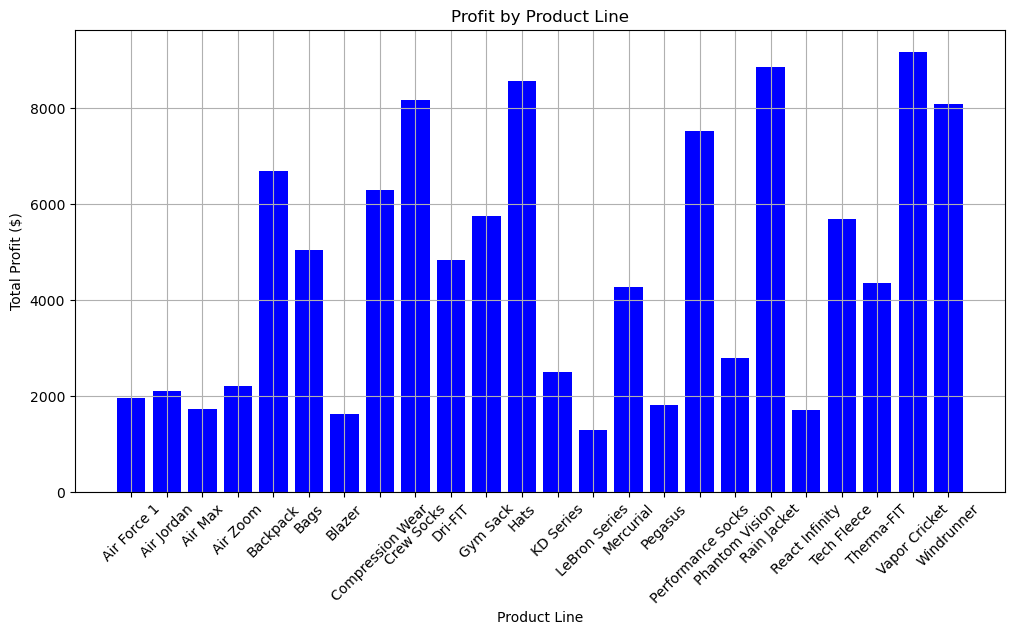

In [60]:
# Aggregate profit by Product Line
product_profit = new.groupby("Product_Line")["Unit_Profit"].sum()

# Plot Profit by Product Line
plt.figure(figsize=(12, 6))
plt.bar(product_profit.index, product_profit.values, color='blue')
plt.xticks(rotation=45)
plt.title("Profit by Product Line")
plt.xlabel("Product Line")
plt.ylabel("Total Profit ($)")
plt.grid()
plt.show()

### Graph 2: Line Chart: Monthly total Profit

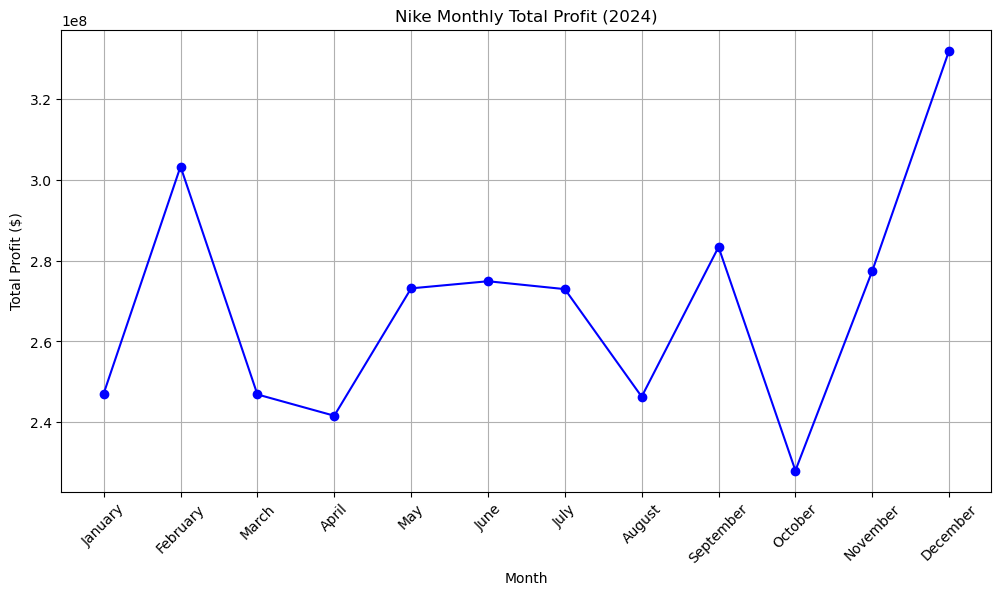

In [61]:
# Compute Total Profit per row (without modifying the original dataset)
new["Total_Profit"] = (new["Retail_Price"] - new["Unit_cost"]) * new["Units_Sold"]

# Aggregate total profit by month
monthly_profit = new.groupby("Month")["Total_Profit"].sum()

# Sort months correctly
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_profit = monthly_profit.reindex(month_order)

# Plot Monthly Total Profit
plt.figure(figsize=(12, 6))
plt.plot(monthly_profit.index, monthly_profit.values, marker='o', linestyle='-', color='blue', label="Total Profit ($)")

# Title and Labels
plt.title("Nike Monthly Total Profit (2024)")
plt.xlabel("Month")
plt.ylabel("Total Profit ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

## **5. identify Missing values in Cost Dataset**


In [62]:
missing_Count = new["Unit_cost"].isna().sum()
missing_Count

21

In [63]:
missing_costs = new[new["Unit_cost"].isna()]
missing_costs

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price,Unit_cost,Unit_Profit,Total_Profit
133,December,India,Footwear,Lifestyle,Air Force 1,Mid-Range,28038,1401900,63,50,NaN,NaN,NaN
148,December,Europe,Footwear,Lifestyle,Air Force 1,Mid-Range,49565,9417350,90,190,NaN,NaN,NaN
163,August,South Korea,Footwear,Lifestyle,Air Force 1,Premium,5580,1339200,66,240,NaN,NaN,NaN
236,July,South Korea,Footwear,Lifestyle,Air Force 1,Mid-Range,23339,7001700,84,300,NaN,NaN,NaN
257,July,Southeast Asia,Footwear,Lifestyle,Air Force 1,Premium,5233,313980,55,60,NaN,NaN,NaN
339,July,Japan,Footwear,Lifestyle,Air Force 1,Premium,32062,4809300,52,150,NaN,NaN,NaN
362,May,Europe,Footwear,Lifestyle,Air Force 1,Premium,18939,4355970,78,230,NaN,NaN,NaN
538,May,South Korea,Footwear,Lifestyle,Air Force 1,Premium,24535,4170950,71,170,NaN,NaN,NaN
586,May,America,Footwear,Lifestyle,Air Force 1,Mid-Range,7516,1202560,75,160,NaN,NaN,NaN
593,September,Japan,Footwear,Lifestyle,Air Force 1,Mid-Range,17902,1611180,65,90,NaN,NaN,NaN


## **6. Export Missing Records for Further Review**

# **Result file**  

The records with missing unit costs have been saved to a new file for further investigation.

In [64]:
# Generate a new filename with today's date
file_name = "Assignment5_output_CarolChan_"+ date.today().isoformat()+'.csv'

# Save the DataFrame to a CSV file
missing_costs.to_csv("../Result/"+ file_name)